## Problem 1

A visual research lab has purchased a digital colour blindness test from a company. Before they can use the test in their research, they must ensure it is properly calibrated. To do this they must check that they get the same results as the company when testing participants with no colour deficiencies. The company states that participants with healthy colour vision will score 15 on the test on average. The research lab tests 13 participants with healthy colour vision. On average they score 12 with a standard deviation of 3.6. Is their machine properly calibrated?


<div class = "exercise">
<h1>Exercise 1</h1>
Write the hypotheses for testing whether the machine is properly calibrated or not.
</div>

We will now conduct hypothesis tests for testing if the average score of participants with healthy color vision of the research lab are different than the company provided score. For this task, we can use [`statsmodels`](https://www.statsmodels.org/stable/index.html), a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration.

In [1]:
#import necessary library
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#Sample 
sample_mean = 12
standard_deviation = 3.6
sample_size = 13


#The population mean
popmean = 15

#Create fake data
np.random.seed(20210725)
x = np.random.normal(sample_mean, standard_deviation, sample_size)
print([f'{x:.1f}' for x in sorted(x)])

['7.0', '8.7', '8.7', '10.1', '12.4', '12.9', '13.0', '13.7', '13.9', '14.9', '15.0', '15.0', '15.1']


In [3]:
np.mean(x)

12.34070641310785

In [2]:
#Perform a two-sided one-sample t-test
statistic, pvalue = stats.ttest_1samp(x, popmean)

print(f't-statistic = {statistic:5.5f}',f'p = {pvalue:5.5f}')

t-statistic = -3.43810 p = 0.00491


The p-value is less than the significance level. Therefore our result is significantly different and 
we can conclude that the machine is not calibrated properly.

<div class = "exercise">
<h2>Exercise 2</h2>
Construct the confidence intervals. Does the conclusion from the hypothesis test agree with the findings of the confidence interval?
</div>


In [3]:
#Confidence interval (CI)
se = np.std(x)/np.sqrt(sample_size)
lower = sample_mean - (statistic * se)
upper = sample_mean + (statistic * se)
print(lower, upper)

14.554966634968489 9.445033365031511


Yes, the hypothesis test found a significant difference, and the CI does not contain the null value of 0.

## Problem 2

In a study twenty participants were given a list of 20 words to process. The 20 participants were randomly assigned to one of two treatment conditions. Half were instructed to count the number of vowels in each word (shallow processing). Half were instructed to judge whether the object described by each word would be useful if one were stranded on a desert island (deep processing). After a brief distractor task, all subjects were given a surprise free recall task. The number of words correctly recalled was recorded for each subject. 

Did the instructions given to the participants significantly affect their level of recall at the 5% significance level (alpha = 0.05)?

Hints: The above problem involves an experiment with two treatment conditions. The goal of your test is to see if there is significant mean difference between the two treatment groups.

In [5]:
#Data is given below
ShallowProcessing = [13, 12,11, 9, 11, 13, 14, 14, 14, 15]
DeepProcessing = [12, 15, 14, 14, 13, 12, 15, 14, 16, 17]

In [6]:
##find variance for each group
print(np.var(ShallowProcessing), np.var(DeepProcessing))

#perform two sample t-test with equal variances
statistic, pvalue = stats.ttest_ind(ShallowProcessing, DeepProcessing, equal_var=True)

print(f't-statistic = {statistic:5.5f}',f'p = {pvalue:5.5f}')

3.04 2.3600000000000003
t-statistic = -2.06559 p = 0.05357


Here the corresponding p-value of the test statistic is greater than alpha level of 0.05. Hence, we would conclude that there is not a significant difference in recall between the two treatment groups.

## Problem 3 on Iris_Data.csv (Blackboard)

The data set contains the sepal and petal length and width of various floral species.

<div class = "exercise">
<h3>Exercise 3</h3>
Test if there is a significant difference in the petal lenght between the species Iris-setosa and Iris-virginica.
</div>

In [8]:
#Load the dataset
df = pd.read_csv('Iris_Data.csv')


#To make the code in the next steps a bit cleaner to read, I will create 2 data frames that are subsets of the original data 
#where each data frame only contains data for a respective flower species.
setosa = df[df['species'] == 'Iris-setosa']['petal_length']
virginica = df[df['species'] == 'Iris-virginica']['petal_length']


##find variance for each group
print(f'setosa_variance = {np.var(setosa):5.5f}', 'and',f'virginica_variance = {np.var(virginica):5.5f}')


#perform two sample t-test with unequal variances: Welchs test
statistic, pvalue = stats.ttest_ind(setosa, virginica, equal_var=False)

print(f't-statistic = {statistic:5.5f}',f'p = {pvalue:5.5f}')

setosa_variance = 0.02950 and virginica_variance = 0.29850
t-statistic = -49.96570 p = 0.00000


<div class = "exercise">
<h4>Exercise 4</h4>
Test if there is a significant difference in the petal lenght between the species Iris-setosa and Iris-versicolor.
</div>

## Problem 4

Suppose we want to know whether a certain study program significantly impacts student performance on a particular exam. To test this, we have 15 students in a class take a pre-test. Then, we have each of the students participate in the study program for two weeks. Then, the students retake a test of similar difficulty. To compare the 'difference' between the mean scores on the first and second test, we use a paired samples t-test because for each student their first test score can be paired with their second test score.


In [9]:
#Data is given below
pre = [88, 82, 84, 93, 75, 78, 84, 87, 95, 91, 83, 89, 77, 68, 91]
post = [91, 84, 88, 90, 79, 80, 88, 90, 90, 96, 88, 89, 81, 74, 92]

In [10]:
#perform the paired samples t-test
statistic, pvalue = stats.ttest_rel(pre, post)

print(f't-statistic = {statistic:5.5f}',f'p = {pvalue:5.5f}')

t-statistic = -2.97325 p = 0.01007


Here the corresponding p-value of the test statistic is less than alpha level. Hence we have enough evidence to reject the null hypothesis.

## Problem 5

An  assertiveness  training  course  has  just  been  added  to the  services offered  by  a  counseling  center. To  measure  its  effectiveness,  ten students are given a test at the beginning of the course and again at the end. A  high  score  on  the  test  implies  high  assertiveness.  

Do the  data provide sufficient evidence to conclude that people are 'more assertive' after taking the course? Test at the 5% significance level (alpha=0.05).

In [11]:
#Data is given below
Before = [50, 62, 51, 41, 63, 56, 49, 67, 42, 57]
After = [65, 68, 52, 43, 60, 70, 48, 69, 53, 61]

In [12]:
#perform the paired samples t-test
statistic, pvalue = stats.ttest_rel(Before, After)

print(f't-statistic = {statistic:5.5f}',f'p = {pvalue:5.5f}')

t-statistic = -2.57552 p = 0.02992


Here the corresponding p-value of the test statistic is less than alpha level. Hence we have enough evidence to reject the null hypothesis.

## Problem 6

Is it possible to perform a t-test when the sample sizes of each group are not equal?

Example 1: Unequal Sample Sizes and Equal Variances

Suppose we administer two programs designed to help students score higher on some exam.

The results are as follows:

Program 1:

n (sample size): 500,
x (sample mean): 80,
s (sample standard deviation): 5.


Program 2:

n (sample size): 20,
x (sample mean): 85,
s (sample standard deviation): 5.

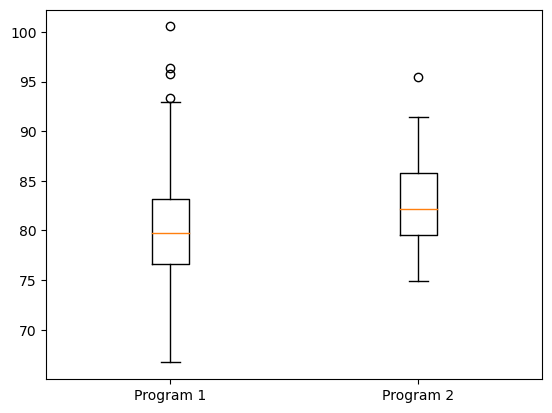

Ttest_indResult(statistic=-2.527324850969138, pvalue=0.011789907002230813)
Ttest_indResult(statistic=-2.393079666654935, pvalue=0.026439577184477907)


In [13]:
#make this example reproducible
np.random.seed(2)

sample_mean1 =  80
standard_deviation1 = 5
sample_size1 = 500

#Create fake data for program 1
x_program1 = np.random.normal(sample_mean1, standard_deviation1, sample_size1)
#print([f'{x_program1:.1f}' for x_program1 in sorted(x_program1)])

sample_mean2 =  85
standard_deviation2 = 5
sample_size2 = 20

#Create fake data for program 2
x_program2 = np.random.normal(sample_mean2, standard_deviation2, sample_size2)

#print([f'{x_program2:.1f}' for x_program2 in sorted(x_program2)])

#Box plots of different columns for each gender
box_plot_data=[x_program1, x_program2]
plt.boxplot(box_plot_data,labels=['Program 1','Program 2'])
plt.show()


print(stats.ttest_ind(x_program1, x_program2, equal_var=True))
print(stats.ttest_ind(x_program1, x_program2, equal_var=False))


The independent samples t-test (or equal variance) returns a p-value of 0.011 and Welch’s t-test (unequal variance) returns a p-value of 0.026.

Since the p-value of each test is less than the significance level 0.05, we would reject the null hypothesis in each test and conclude that there is a statistically significant difference in mean exam scores between the two programs.

Even though the sample sizes are unequal, the independent samples t-test and Welch’s t-test both return similar results since the two samples had equal variances.

Example 2: Unequal Sample Sizes and Unequal Variances

Suppose we administer two programs designed to help students score higher on some exam.

The results are as follows:

Program 1:
n (sample size): 500,
x (sample mean): 80,
s (sample standard deviation): 20.

Program 2:
n (sample size): 20,
x (sample mean): 85,
s (sample standard deviation): 5.

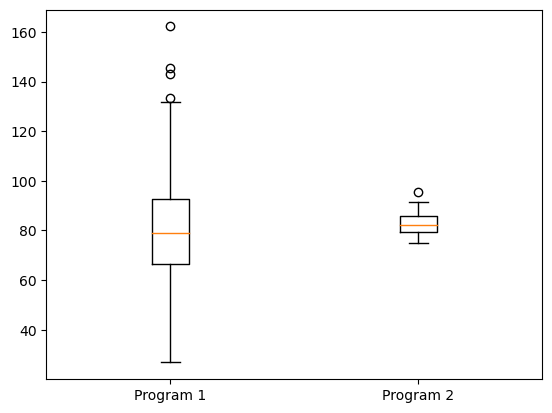

Ttest_indResult(statistic=-0.6962426138740059, pvalue=0.4865891845220448)
Ttest_indResult(statistic=-2.1008541246505716, pvalue=0.04114035563256625)


In [14]:
#make this example reproducible
np.random.seed(2)

sample_size11 = 500
mean11 =  80
standard_deviation11 = 20


#Create fake data for program 1
x_program11 = np.random.normal(mean11, standard_deviation11, sample_size11)
#print([f'{x_program11:.1f}' for x_program11 in sorted(x_program11)])

sample_size22 = 20
mean22 =  85
standard_deviation22 = 5


#Create fake data for program 2
x_program22 = np.random.normal(mean22, standard_deviation22, sample_size22)
#print([f'{x_program22:.1f}' for x_program22 in sorted(x_program22)])

#Box plots of different columns for each gender
box_plot_data=[x_program11, x_program22]
plt.boxplot(box_plot_data,labels=['Program 1','Program 2'])
plt.show() 

print(stats.ttest_ind(x_program11, x_program22, equal_var=True))
print(stats.ttest_ind(x_program11, x_program22, equal_var=False))

The independent samples t-test returns a p-value of 0.48 and Welch’s t-test returns a p-value of 0.04.

The independent samples t-test is not able to detect a difference in mean exam scores, but the Welch’s t-test is able to detect a statistically significant difference.

Since the two samples had unequal variances, only Welch’s t-test was able to detect the statistically significant difference in mean exam scores since this test does not make the assumption of equal variances between samples.

## Homework assignment due by February 27 (midnight)

## Problem 1: 

A psychology student, Sarah, is giving out sleep diaries to her university friends to monitor the number of hours of sleep they have each night. Sarah believes that university students sleep for 6 hours per night on average. Below is the data that they collected. The number of hours sleep per night for each student was averaged over a one month monitoring period. Is there any evidence to suggest that Sarah’s belief is incorrect? [20 points]
 
1. What would be the null hypothesis in this study?
2. What would be the alternate hypothesis?
3. What significance level did you choose?
4. Using any programming language, what is your computed answer? Interpret your answer.

Data:

Hours of sleep per night=[7.2, 8.7, 5.4, 6.1, 5.6, 6.7, 5.9, 6.3, 7.0, 4.2]

1. What would be the null hypothesis in this study?
The null hypothesis is that university students sleep 6 hours on average.
H: 

2. What would be the alternate hypothesis?
That university students don't sleep 6 hours on average.

3. What significance level did you choose?
I chose 0.05 as the significance level 

In [15]:
len([7.2, 8.7, 5.4, 6.1, 5.6, 6.7, 5.9, 6.3, 7.0, 4.2])

10

In [16]:
#intitalize X
x= [7.2, 8.7, 5.4, 6.1, 5.6, 6.7, 5.9, 6.3, 7.0, 4.2]

In [18]:
#Perform a two-sided one-sample t-test
statistic, pvalue = stats.ttest_1samp(x, 6)

print(f't-statistic = {statistic:5.5f}',f'p = {pvalue:5.5f}')

t-statistic = 0.81165 p = 0.43793


4. Using any programming language, what is your computed answer? Interpret your answer
The p-value is greater than the significance level suggesting the difference is not stastically significant so we can't reject the null hypothesis.

## Problem 2: 

A researcher reads a paper introducing a new test of executive function. The authors of the paper had tested on healthy volunteers and found that on average they score 51 on the new test. The researcher believes that patients with schizophrenia will score less than the normal average on this test of executive function. They test 22 patients with schizophrenia. The average score for the patients is 39 with a standard deviation of 4.3. Is there significant evidence at the 5% level to support the researcher's claim? [20 points]

1. What would be the null hypothesis in this study?
2. What would be the alternate hypothesis?
3. What is your computed answer? Interpret your answer.
4. Does the result hold the same if the significanc level is reduced to 1%?




1. What would be the null hypothesis in this study?
That patients with schizionphrenia will score less than their neurotypical counterparts on the executive function test. 
H0: NT > ST
    
2. What would be the alternate hypothesis?
That patients with schizophrenia do not score less than neurotypical counterparts on the executive test
H1: NT= < ST 

In [37]:
#Sample 
st_sample_mean = 39
st_standard_deviation = 4.3
sample_size = 22


#The population mean
popmean = 51

#Create fake data
np.random.seed(20210725)
x = np.random.normal(st_sample_mean, st_standard_deviation, sample_size)
print([f'{x:.1f}' for x in sorted(x)])

['32.3', '33.0', '35.1', '35.1', '36.4', '36.7', '37.8', '39.4', '39.5', '39.5', '40.1', '40.1', '41.1', '41.2', '41.6', '41.9', '42.5', '42.5', '42.6', '42.6', '42.7', '45.3']


In [41]:
#Perform a two-sided one-sample t-test
statistic, pvalue = stats.ttest_1samp(x, popmean, alternative='less')
print(f't-statistic = {statistic:5.5f}',f'p = {pvalue:5.5f}')

2.5690065890719066e-13
t-statistic = -15.58422 p = 0.00000


3.What is your computed answer? Interpret your answer.
P_value is less thatn alpha, so the null hypothesis is rejected. 

4.Does the result hold the same if the significance level is reduced to 1%?
The results hold at the 1 percent significance.

## Problem 3:

A research study was conducted to examine the differences between older and younger adults on perceived life satisfaction. A pilot study was conducted to examine this hypothesis. Ten older adults (over the age of 70) and ten younger adults (between 20 and 30) were give a life satisfaction test (known to have high reliability and validity). Scores on the measure range from 0 to 60 with high scores indicative of high life satisfaction; low scores indicative of low life satisfaction. The data are presented below. Compute the appropriate t-test, and answer the following questions.[20 points]

1. What would be the null hypothesis in this study?
2. What would be the alternate hypothesis?
3. What significance level did you choose?
4. Using any programming language, what is your computed answer? Interpret your answer.

Data:

Older Adults=[45, 38, 52, 48, 25, 39, 51, 46, 55, 46]

Younger Adults=[34, 22, 15, 27, 37, 41, 24, 19, 26, 36]


1.What would be the null hypothesis in this study?
Life satisfaction test results will be the same for older and younger adults
H0: OA = YA

2.What would be the alternate hypothesis?
There is a difference between the life satisfaction for older and younger adults. 
H1: OA != YA
3.What significance level did you choose?
I chose 0.05

In [42]:
Older_Adults=[45, 38, 52, 48, 25, 39, 51, 46, 55, 46]

Younger_Adults=[34, 22, 15, 27, 37, 41, 24, 19, 26, 36]

In [43]:
statistic, pvalue = stats.ttest_ind(Older_Adults , Younger_Adults, equal_var=False)
print(f't-statistic = {statistic:5.5f}',f'p = {pvalue:5.5f}')

t-statistic = 4.25755 p = 0.00047


4. Using any programming language, what is your computed answer? Interpret your answer.
The pvalue is less than alpha so we can reject the null hypothesis. This means there is a stastically significanct different between older adults and younger adults and life satisfaction. 

## Problem 4:

A researcher hypothesizes that electrical stimulation of the lateral habenula will result in a decrease in food intake (in this case, chocolate chips) in rats. Rats undergo stereotaxic surgery and an electrode is implanted in the right lateral habenula. Following a ten day recovery period, rats (kept at 80 percent body weight) are tested for the number of chocolate chips consumed during a 10 minute period of time both with and without electrical stimulation. The testing conditions are counter balanced. Compute the appropriate t-test for the data provided below, and answer the following questions. [20 points]

1. What would be the null hypothesis in this study?
2. What would be the alternate hypothesis?
3. What significance level did you choose?
4. Using any programming language, what is your computed answer? Interpret your answer.

Data:

Simulation=[12, 7, 3, 11, 8, 5, 14, 7, 9, 10]

No simulation=[8, 7, 4, 14, 6, 7, 12, 5, 5, 8]

1. What would be the null hypothesis in this study?
That rats with electrical stimulation eat less chocolate chips
H0: St < NSt
2. What would be the alternate hypothesis?
The electrical stimulation doesn't cause the rates to eat less chocolate chips.
H1: St !< NSt 
3. What significance level did you choose?
I chose 0.05.

In [45]:
Simulation=[12, 7, 3, 11, 8, 5, 14, 7, 9, 10]
No_simulation=[8, 7, 4, 14, 6, 7, 12, 5, 5, 8]

In [48]:
#perform the paired samples t-test
statistic, pvalue = stats.ttest_rel(Simulation, No_simulation, alternative='less')

print(f't-statistic = {statistic:5.5f}',f'p = {pvalue:5.5f}')

t-statistic = 1.31559 p = 0.88958


4. Using any programming language, what is your computed answer? Interpret your answer.
The null hypothesis is not rejected  because the p value is greater than alpha. The t-test that electrically stimulated rats did not eat significanctly less amount of chips

## Problem 5:

Sleep researchers decide to test the impact of REM sleep deprivation on a computerized assembly line task. Subjects are required to participate in two nights of testing. On the nights of testing EEG, EMG, EOG measures are taken. On each night of testing the subject is allowed a total of four hours of sleep. However, on one of the nights, the subject is awakened immediately upon achieving REM sleep. On the alternate night, subjects are randomly awakened at various times throughout the 4 hour total sleep session. Testing conditions are counterbalanced so that half of the subject experience REM deprivation on the first night of testing and half experience REM deprivation on the second night of testing. Each subject after the sleep session is required to complete a computerized assembly line task. The task involves five rows of widgets slowly passing across the computer screen. Randomly placed on a one/five ratio are widgets missing a component that must be "fixed" by the subject. Number of missed widgets is recorded. Compute the appropriate t-test for the data provided below, and answer the following questions. [20 points]

1. What would be the null hypothesis in this study?
2. What would be the alternate hypothesis?
3. What significance level did you choose?
4. Using any programming language, what is your computed answer? Interpret your answer.


Data:

REM Deprived=[26, 15, 8, 44, 26, 13, 38, 24, 17, 29]

Control Condition=[20, 4, 9, 36, 20, 3, 25, 10, 6, 14]

1. What would be the null hypothesis in this study?
There is no difference between the REM Deprived group and the control group.

2. What would be the alternate hypothesis?
There is a differenece between the REM deprived grouped and the control group

3. What significance level did you choose?
The significance level I choose os 0.05

In [52]:
REM_Deprived=[26, 15, 8, 44, 26, 13, 38, 24, 17, 29]
Control_Condition=[20, 4, 9, 36, 20, 3, 25, 10, 6, 14]
statistic, pvalue = stats.ttest_rel(REM_Deprived , Control_Condition)
print(f't-statistic = {statistic:5.5f}',f'p = {pvalue:5.5f}')

t-statistic = 6.17565 p = 0.00016


4. Using any programming language, what is your computed answer? Interpret your answer.
There is a statistically significant difference between REM deprived group and the control group due to pvalue being less than 0.05.